In [2]:
import pennylane as qml
import torch
import numpy as np
import matplotlib.pyplot as plt

In [11]:
dev = qml.device('default.qubit', wires=2)

@qml.qnode(dev, interface='torch')
def circuit(phi, theta):
    qml.PauliX(wires=0)
    qml.PauliX(wires=1)
    qml.RY(phi, wires=0)
    qml.CNOT(wires=[0, 1])
    qml.RY(theta, wires=1)
    return qml.expval(qml.PauliZ(0))

In [15]:
thetas = np.linspace(-np.pi,np.pi,50)    #cria vetor de 50 coordenadas aleatórias entre -pi e pi
phis = np.linspace(-np.pi,np.pi,50)  #cria vetor de 50 coordenadas aleatórias entre -pi e pi

measurements = []
for phi, theta in zip(phis,thetas):
    measurements.append(circuit(phi, theta))

measurements = np.array(measurements)


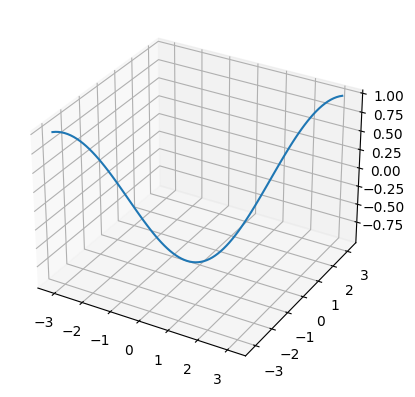

In [29]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot3D(phis, thetas, measurements)

plt.show()

In [32]:
len(thetas)

100

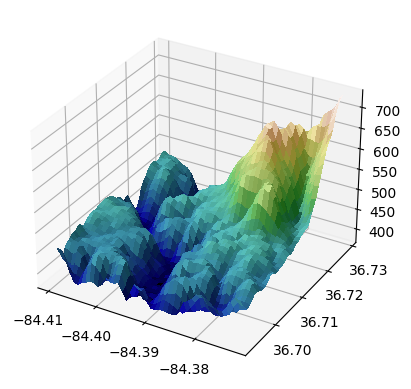

In [30]:
from matplotlib import cbook
from matplotlib import cm
from matplotlib.colors import LightSource
import matplotlib.pyplot as plt
import numpy as np

# Load and format data
dem = cbook.get_sample_data('jacksboro_fault_dem.npz', np_load=True)
z = dem['elevation']
nrows, ncols = z.shape
x = np.linspace(dem['xmin'], dem['xmax'], ncols)
y = np.linspace(dem['ymin'], dem['ymax'], nrows)
x, y = np.meshgrid(x, y)

region = np.s_[5:50, 5:50]
x, y, z = x[region], y[region], z[region]

# Set up plot
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))

ls = LightSource(270, 45)
# To use a custom hillshading mode, override the built-in shading and pass
# in the rgb colors of the shaded surface calculated from "shade".
rgb = ls.shade(z, cmap=cm.gist_earth, vert_exag=0.1, blend_mode='soft')
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=rgb,
                       linewidth=0, antialiased=False, shade=False)

plt.show()

In [2]:
def cost(phi, theta):
    return torch.abs(circuit(phi, theta) - 0.5)**2

phi = torch.tensor([0.011, 0.012], requires_grad=True)
theta = torch.tensor(0.05, requires_grad=True)

opt = torch.optim.Adam([phi, theta], lr = 0.1)

steps = 200

def closure():
    opt.zero_grad()
    loss = cost(phi, theta)
    loss.backward()
    return loss

for i in range(steps):
    opt.step(closure)

In [3]:
phi_final, theta_final = opt.param_groups[0]['params']
phi_final

tensor([ 7.3448e-01, -1.0113e-04], requires_grad=True)

In [4]:
theta_final

tensor(0.8316, requires_grad=True)

In [5]:
circuit(phi_final, theta_final)

tensor(0.5000, dtype=torch.float64, grad_fn=<SqueezeBackward0>)